In [1]:
import rootpath
import sys
import os
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np

from testsuite.utilities import Pareto_split

In [2]:
import matplotlib
matplotlib.rcParams['font.size'] = 15 ;
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 8)

In [3]:
SCRIPT_DIR = os.getcwd()
def save_fig(fig, name=None):
    savedirs = [os.path.join(SCRIPT_DIR, "figures/"), '/home/finley/phd/papers/SAF-driven-EMO/presentation/SAF-EMO_presentation/figures']
    for d in savedirs:
        fig.savefig(os.path.join(d, name+".png"), dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait', pad_inches=0.12)
        fig.savefig(os.path.join(d, name+".pdf"), bbox_inches = 'tight', pad_inches = 0, dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait')

In [4]:
def random_circle_points(r, c, n):
    c = np.asarray(c).reshape(1,-1)
    n_dim = c.shape[1]
    
    points = np.random.uniform(-r, r, size=(int(n*2), n_dim))
    rp = points[(points[:, 0]**2+points[:, 1]**2)<r**2][:n]
    if rp.shape[0]<n:
        return random_circle_points(r, c, n)
    else:
        return rp+c
    
def gen_mock_objective_queries(r, c, n, distortion= [1., 1.]):
    c_points = random_circle_points(r, c, n*25)
    c_points = c_points[np.array(c_points[:, 0]<c[0]) * np.array(c_points[:, 1]<c[1])]
    # downsample non pareto optimal
    p, d = Pareto_split(c_points)
    d = d[::3]
    
    points = np.vstack((p, d))
    
    points = points[np.random.choice(points.shape[0], n, False)]
    
    return points*distortion

def gen_attainment_front_from_points(y, minimise=True):
    sorted_y = y[np.argsort(y[:,0])]
    attainment_points = np.zeros((y.shape[0]*2-1, 2))
    
    if not minimise:
        attainment_points[::2, 0] = sorted_y[:, 0]
        attainment_points[1::2, 0] = sorted_y[:-1, 0]
        attainment_points[::2, 1] = sorted_y[:, 1]
        attainment_points[1::2, 1] = sorted_y[1:, 1]
    else:
        attainment_points[::2, 1] = sorted_y[:, 1]
        attainment_points[1::2, 1] = sorted_y[:-1, 1]
        attainment_points[::2, 0] = sorted_y[:, 0]
        attainment_points[1::2, 0] = sorted_y[1:, 0]
        
    return attainment_points 

def gen_attainment_front_with_axis(ax, y, minimise=True):
    # fix limits
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    
    if minimise:
        # add axis limits to points
        sorted_y = y[np.argsort(y[:,0])]
        first_point = np.array([sorted_y[0][0], ax.get_ylim()[1]]).reshape(1,-1)
        last_point = np.array([ax.get_xlim()[1], sorted_y[-1][1]]).reshape(1,-1)
        
        sorted_y = np.vstack((first_point, sorted_y, last_point))
    else:
        sorted_y = y[np.argsort(y[:,0])]
        first_point = np.array([ax.get_xlim()[0], sorted_y[0][1]]).reshape(1,-1)
        last_point = np.array([sorted_y[-1][0], ax.get_ylim()[0]]).reshape(1,-1)
        sorted_y = np.vstack((first_point, sorted_y, last_point))
        
    attainment_points = gen_attainment_front_from_points(sorted_y, minimise=minimise)
    return attainment_points
    

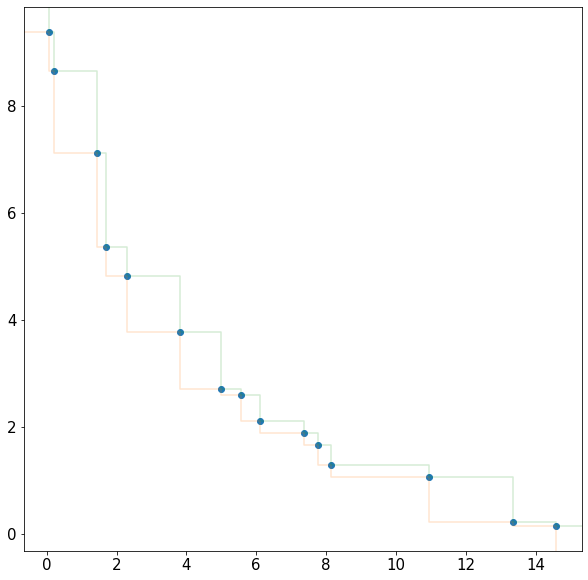

In [5]:
np.random.seed(5)
radius = 10
scaling = [1.5, 1.]
points = gen_mock_objective_queries(radius, [radius, radius], 150, scaling)
points.shape
p_points = Pareto_split(points)[0][:15]

fig = plt.figure(figsize=[10,10])
ax = fig.gca()

ax.scatter(*p_points.T, c="C0", )
attainment_front = gen_attainment_front_with_axis(ax, p_points, minimise=False)
ax.plot(*attainment_front.T, c="C1", alpha=0.2, markersize=20)
attainment_front = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*attainment_front.T, c="C2", alpha=0.2, markersize=20)

In [6]:
np.random.seed(5)
radius = 10
scaling = [1.5, 1.]
points = gen_mock_objective_queries(radius, [radius, radius], 150, scaling)
points.shape

(150, 2)

In [7]:
front_points_x = np.linspace(0, radius, 400)
front_points_x *= -1 
front_points_y = np.sqrt(radius**2-front_points_x**2)*-1
front_points_y += radius
front_points_x += radius
front_points_x *= scaling[0]
front_points_y *= scaling[1]

front_points = np.vstack((front_points_x, front_points_y)).T

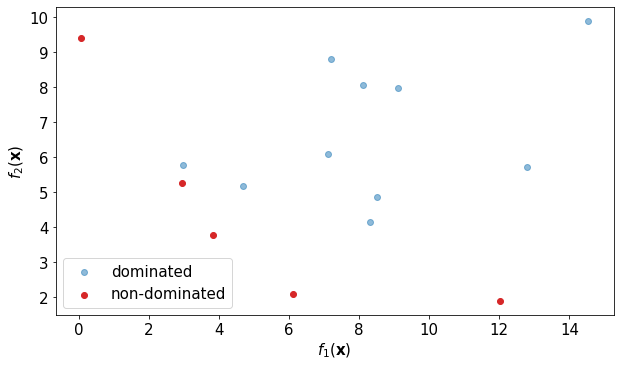

In [8]:
n_p = 15
p_points, d_points = Pareto_split(points[:n_p])
fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated')
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure00_basic_scatter")

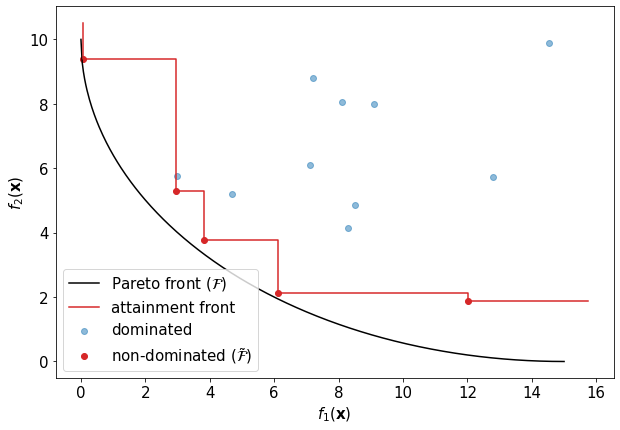

In [9]:
n_p = 15
p_points, d_points = Pareto_split(points[:n_p])
fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure10_basic_Pareto_front")

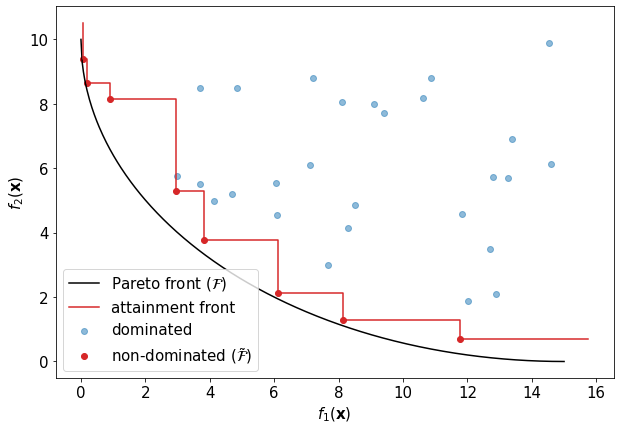

In [10]:
n_p = 35
p_points, d_points = Pareto_split(points[:n_p])
fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")


save_fig(fig, name="figure11_basic_Pareto_front_2")

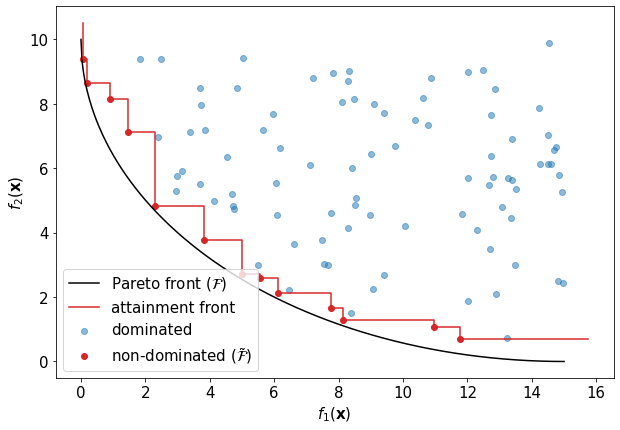

In [11]:
n_p = 100
p_points, d_points = Pareto_split(points[:n_p])
fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure12_basic_Pareto_front_3")

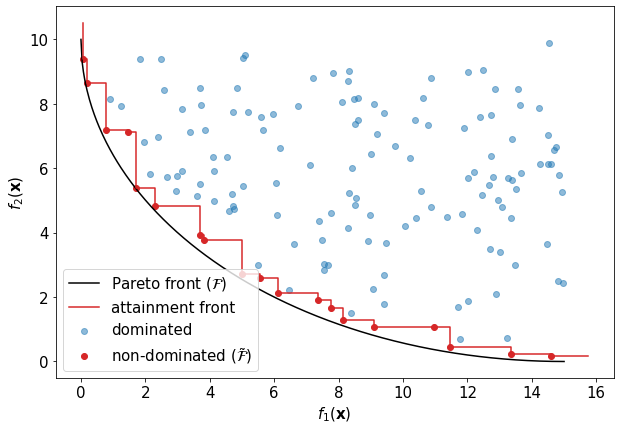

In [12]:
n_p = 150
p_points, d_points = Pareto_split(points[:n_p])
fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")


save_fig(fig, name="figure13_basic_Pareto_front_4")